# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* X : 100 valores distribuídos según una N(1.5, 2.5)
* Ye = 5 + 1.9 * x + e
* e estará distribuído según una N(0, 0.8)

In [45]:
import pandas as pd
import numpy as np

In [46]:
x = 1.5 + 2.5 * np.random.randn(100)

In [47]:
res = 0 + 0.8 * np.random.randn(100)

In [48]:
y_pred = 5 + 0.3 * x

In [49]:
y_act = 5 + 0.3 * x + res

In [50]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [51]:
data = pd.DataFrame(
    {
        "x":x_list,
        "y_actual":y_act_list,
        "y_prediccion":y_pred_list
    }
)

In [52]:
data.head()

,x,y_actual,y_prediccion
0,2.765112,5.934628,5.829534
1,-4.377792,3.411664,3.686663
2,3.003454,5.234219,5.901036
3,3.433000,6.484638,6.029900
4,-3.851844,2.310918,3.844447


In [53]:
import matplotlib.pyplot as plt

In [54]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

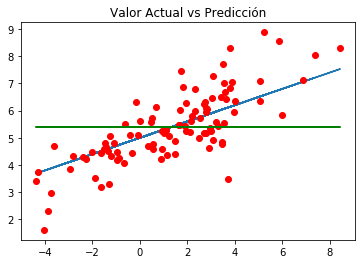

In [55]:
%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.title("Valor Actual vs Predicción")

## ¿Como es la predicción de buena?
* SST = SSD + SSR
* SST : Variabilidad de los datos con respecto de su media
* SSD : Diferencia entre los datos originales y las predicciones que el modelo no es capaz de explicar (errores que deberían seguir una distribución normal)
* SSR : Diferencia entre la regresión y el valor medio que el modelo busca explicar
* R2 = SSR / SST, coeficiente de determinación entre 0 y 1

In [56]:
from IPython.display import Image

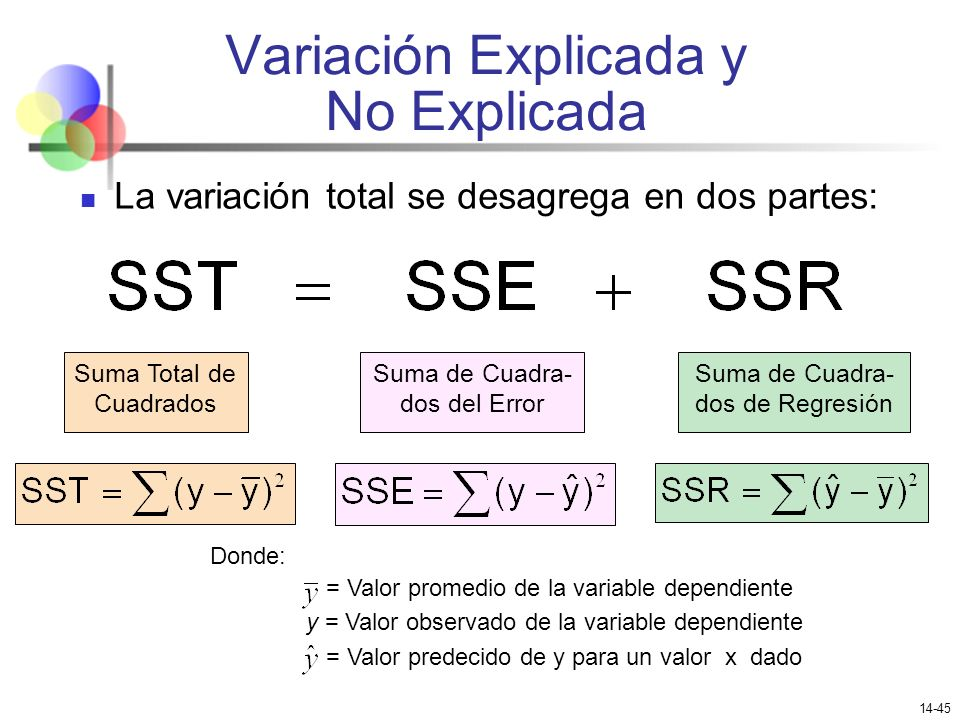

In [57]:
Image(filename='../Recursos/Regresion Lineal/Variacion 1.jpg')

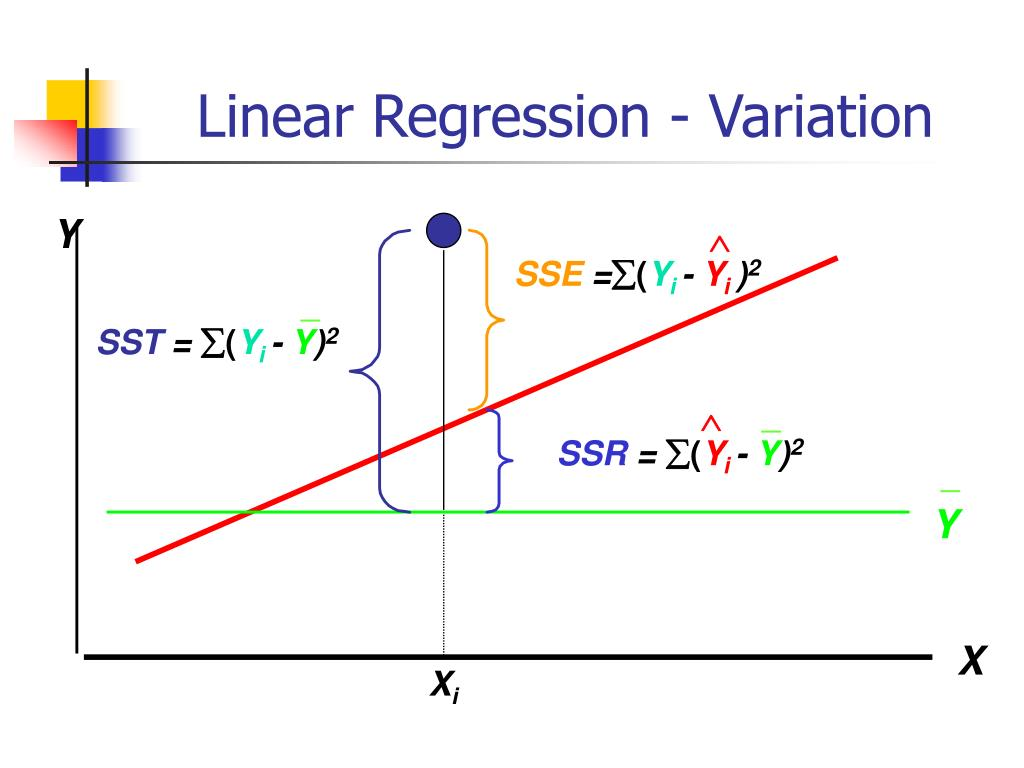

In [58]:
Image(filename='../Recursos/Regresion Lineal/Variacion 2.jpg')

In [59]:
y_m = np.mean(y_act)
data["SSR"]=(data["y_prediccion"]-y_m)**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-y_m)**2

In [60]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,2.765112,5.934628,5.829534,0.200673,0.011045,0.305875
1,-4.377792,3.411664,3.686663,2.872704,0.075624,3.880521
2,3.003454,5.234219,5.901036,0.269847,0.444645,0.021712
3,3.433000,6.484638,6.029900,0.420335,0.206787,1.216764
4,-3.851844,2.310918,3.844447,2.362742,2.351710,9.428891


In [61]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [62]:
SSR

62.385386624451726

In [63]:
SSD

70.76876918588701

In [64]:
SST

169.31565992752982

In [65]:
SSR+SSD

133.15415581033875

In [66]:
R2 = SSR/SST

In [67]:
R2

0.36845609349515457

(array([ 3.,  4.,  6., 17., 29., 21., 12.,  6.,  0.,  2.]),
 array([-2.31786149, -1.82228716, -1.32671284, -0.83113851, -0.33556418,
         0.16001014,  0.65558447,  1.15115879,  1.64673312,  2.14230745,
         2.63788177]),
 <a list of 10 Patch objects>)

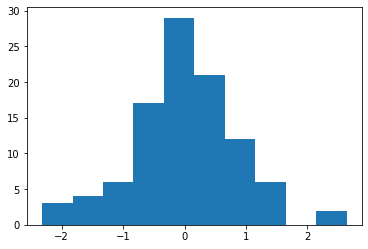

In [68]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [69]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.328120919372036, 5.3815678853934354)

In [70]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [71]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [72]:
alpha = y_mean - beta * x_mean

In [73]:
alpha, beta

(4.867420902694054, 0.38712362345928697)

El modelo lineal obtenido por regresión es:
y = 5.042341442370516 + 1.9044490309709992 * x

In [74]:
data["y_model"] = alpha + beta * data["x"]

In [75]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,2.765112,5.934628,5.829534,0.200673,0.011045,0.305875,0.794742,2.064943,5.937861
1,-4.377792,3.411664,3.686663,2.872704,0.075624,3.880521,11.240098,32.557438,3.172674
2,3.003454,5.234219,5.901036,0.269847,0.444645,0.021712,-0.246859,2.806741,6.030129
3,3.433000,6.484638,6.029900,0.420335,0.206787,1.216764,2.321830,4.430517,6.196416
4,-3.851844,2.310918,3.844447,2.362742,2.351710,9.428891,15.905860,26.832040,3.376281


In [76]:
SSR = sum((data["y_model"]-y_mean)**2)
SSD = sum((data["y_model"]-data["y_actual"])**2)
SST = sum((data["y_actual"]-y_mean)**2)

In [77]:
SSR, SSD, SST

(103.83447724252918, 65.48118268500068, 169.31565992752982)

In [78]:
R2 = SSR / SST
R2

0.6132597379768192

Text(0.5, 1.0, 'Valor Actual vs Predicción')

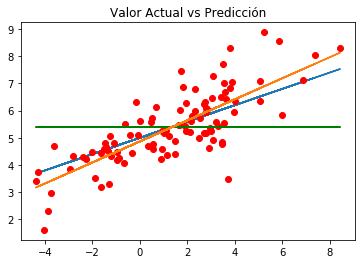

In [79]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"], data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"], data["y_model"])
plt.title("Valor Actual vs Predicción")

## Error estándar de los residuos (RSE)

In [80]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8174199248369317

In [81]:
np.mean(data["y_actual"])

5.3815678853934354

In [82]:
RSE / np.mean(data["y_actual"])

0.1518925231911614